In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix,confusion_matrix, roc_curve, auc
# from sklearn.import_metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer


data = pd.read_csv(
    "diagnosis.data",
    sep="\t",
    encoding="utf-16",
    header=None,
    names=[
        "Temperature",
        "Nausea",
        "Lumbar Pain",
        "Urine Pushing",
        "Micturition pains",
        "Burning",
        "Inflammation",
        "Nephritis",
    ],
)


def temperature(temperature):
    if "," in temperature:
        temperature = temperature.replace(",", ".")
    return temperature


data["Temperature"] = data.apply(lambda row: temperature(row["Temperature"]), axis=1)

data["Temperature"] = data["Temperature"].astype("float")



def boolean_conv(info):
    if info == "no":
        info = 0
    else:
        info = 1
    return info


data["Nausea"] = data.apply(lambda row: boolean_conv(row["Nausea"]), axis=1)
data["Lumbar Pain"] = data.apply(lambda row: boolean_conv(row["Lumbar Pain"]), axis=1)
data["Urine Pushing"] = data.apply(
    lambda row: boolean_conv(row["Urine Pushing"]), axis=1
)
data["Micturition pains"] = data.apply(
    lambda row: boolean_conv(row["Micturition pains"]), axis=1
)
data["Burning"] = data.apply(lambda row: boolean_conv(row["Burning"]), axis=1)
data["Inflammation"] = data.apply(lambda row: boolean_conv(row["Inflammation"]), axis=1)
data["Nephritis"] = data.apply(lambda row: boolean_conv(row["Nephritis"]), axis=1)



In [2]:
import sklearn
# print('The scikit-learn version is {}.'.format(sklearn._version_))
print(sklearn.__version__)


1.0.2


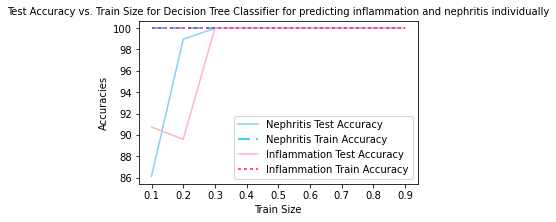

In [3]:
def classifier(X_nephritis,X_inflammation,y_nephritis,y_inflammation):
    test_nephritis_accuracies=[]
    test_inflammation_accuracies=[]
    train_nephritis_accuracies=[]
    train_inflammation_accuracies=[]
        
    for i in range(1,10):
        i=i/10
        # Split the data into training and testing sets
        X_nephritis_train, X_nephritis_test,X_inflammation_train,X_inflammation_test, y_nephritis_train, y_nephritis_test,y_inflammation_train,y_inflammation_test = train_test_split(X_nephritis,X_inflammation, y_nephritis,y_inflammation, train_size=i, random_state=24)
        
        tree_nephritis = DecisionTreeClassifier()
        tree_nephritis.fit(X_nephritis_train, y_nephritis_train)
        test_nephritis_accuracy = tree_nephritis.score(X_nephritis_test,y_nephritis_test)#accuracy_score(y_nephritis_test, y_nephritis_pred)
        y_nephritis_pred = tree_nephritis.predict(X_nephritis_train)
        train_nephritis_accuracy=tree_nephritis.score(X_nephritis_train,y_nephritis_train)
        y_nephritis_pred = tree_nephritis.predict(X_nephritis_test)
        

        tree_inflammation = DecisionTreeClassifier()
        tree_inflammation.fit(X_inflammation_train, y_inflammation_train)
        y_inflammation_pred = tree_inflammation.predict(X_inflammation_test)
        test_inflammation_accuracy=tree_inflammation.score(X_inflammation_test,y_inflammation_test)
        y_inflammation_pred = tree_inflammation.predict(X_inflammation_train)
        train_inflammation_accuracy=tree_inflammation.score(X_inflammation_train,y_inflammation_train)

        
        test_nephritis_accuracies.append(test_nephritis_accuracy*100)
        test_inflammation_accuracies.append(test_inflammation_accuracy*100)
        train_nephritis_accuracies.append(train_nephritis_accuracy*100)
        train_inflammation_accuracies.append(train_inflammation_accuracy*100)
    return test_nephritis_accuracies,test_inflammation_accuracies,train_nephritis_accuracies,train_inflammation_accuracies


def addColumn(nephritis, inflamation):
    onlyNephritis=[0 for i in range(len(nephritis))]
    onlyInflamation=[0 for i in range(len(nephritis))]
    bothNephritisAndInflamation=[0 for i in range(len(nephritis))]
    none=[0 for i in range(len(nephritis))]
    for i in range(len(nephritis)):
        if nephritis[i]==1 and inflamation[i]==1:
            bothNephritisAndInflamation[i]=1
        elif nephritis[i]==0 and inflamation[i]==1:
            onlyInflamation[i]=1
        elif nephritis[i]==1 and inflamation[i]==0:
            onlyNephritis[i]=1
        else:
            none[i]=1
    return (onlyNephritis, onlyInflamation, bothNephritisAndInflamation, none)
        

def plot_accuracies(test_nephritis_accuracies,test_inflammation_accuracies,train_nephritis_accuracies,train_inflammation_accuracies):
    fig, ax = plt.subplots(figsize=(5, 3))
    train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    ax.plot(train_sizes, test_nephritis_accuracies, label='Nephritis Test Accuracy',color='lightskyblue')
    ax.plot(train_sizes, train_nephritis_accuracies, label='Nephritis Train Accuracy',color='deepskyblue',linestyle='--',dashes=(8,4))
    ax.plot(train_sizes, test_inflammation_accuracies, label='Inflammation Test Accuracy',color='lightpink')
    ax.plot(train_sizes, train_inflammation_accuracies, label='Inflammation Train Accuracy',color='deeppink',linestyle='--',dashes=(2,2))
    ax.set_xlabel(f'Train Size',fontsize=10)
    ax.set_ylabel(f'Accuracies',fontsize=10)
    ax.set_title(f'Test Accuracy vs. Train Size for Decision Tree Classifier for predicting inflammation and nephritis individually',size=10)
    ax.legend()
    ax.legend(fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


X_nephritis = data.drop(columns=['Inflammation','Nephritis'], axis=1)
X_inflammation=data.drop(columns=['Inflammation','Nephritis'], axis=1)
y_nephritis = data['Nephritis']
y_inflammation=data["Inflammation"]
test_nephritis_accuracies,test_inflammation_accuracies,train_nephritis_accuracies,train_inflammation_accuracies=classifier(X_nephritis,X_inflammation,y_nephritis,y_inflammation)
plot_accuracies(test_nephritis_accuracies,test_inflammation_accuracies,train_nephritis_accuracies,train_inflammation_accuracies)


(onlyNephritis, onlyInflamation, bothNephritisAndInflamation, none) = addColumn(data["Nephritis"], data["Inflammation"])


# Case 1: A person might have both nephritis and inflammation
data["onlyNephritis"]=onlyNephritis
data["bothNephritisAndInflamation"]=bothNephritisAndInflamation
data["onlyInflammation"]=onlyInflamation
data["none"]=none
data=data.drop(["Nephritis", "Inflammation"], axis = 1)
X = data[['Temperature', 'Nausea', 'Lumbar Pain', 'Urine Pushing', 'Micturition pains', 'Burning']]
y = data[data.columns[6:10]]

from sklearn import metrics
X = data[['Temperature', 'Nausea', 'Lumbar Pain', 'Urine Pushing', 'Micturition pains', 'Burning']]
y = data[data.columns[6:10]]
clf = DecisionTreeClassifier()
y=y.to_numpy()

y = (y == 1).argmax(axis=1)


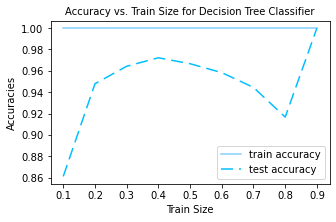

In [4]:
from sklearn.tree import DecisionTreeClassifier
test_accuracies=[]
train_accuracies=[]
for i in range(1,10):
    i=i/10
    clf = DecisionTreeClassifier()
    X_train, X_test,y_train,y_test= train_test_split(X,y,train_size=i, random_state=24)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    train_accuracy=clf.score(X_train, y_train)
    test_accuracy=clf.score(X_test,y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
fig, ax = plt.subplots(figsize=(5, 3))
train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
ax.plot(train_sizes, train_accuracies, label='train accuracy',color='lightskyblue')
ax.plot(train_sizes, test_accuracies, label='test accuracy',color='deepskyblue',linestyle='--',dashes=(8,4))
ax.set_xlabel(f'Train Size',size=10)
ax.set_ylabel(f'Accuracies',size=10)
ax.set_title(f'Accuracy vs. Train Size for Decision Tree Classifier',size=10)
ax.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()




              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.95      0.96      0.95        36
weighted avg       0.96      0.94      0.95        36



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


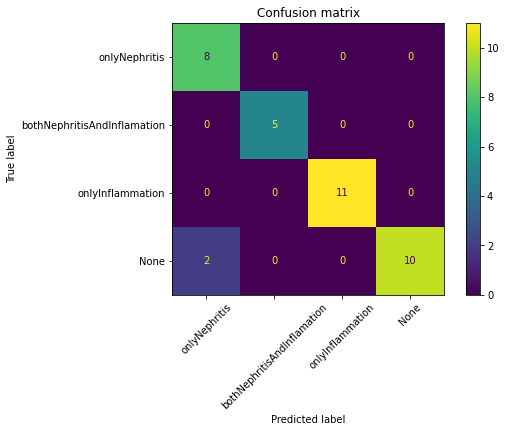

In [15]:
#plotting metrics value for split size of 0.5

X_train, X_test,y_train,y_test= train_test_split(X,y,train_size=0.7, random_state=24)
clf = DecisionTreeClassifier()
y_score=clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

fig, ax = plt.subplots()
class_names=['onlyNephritis', 'bothNephritisAndInflamation', 'onlyInflammation', 'None']
metrics.plot_confusion_matrix(clf, X_test, y_test, ax=ax, display_labels=class_names)
ax.set_title("Confusion matrix")

# rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)


plt.show()



Text(0.5, 1.0, 'classes vs the rest ROC curve')

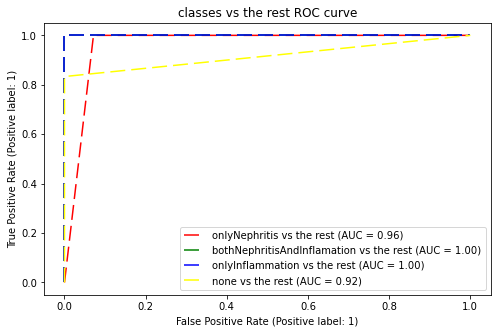

In [10]:
classes=["onlyNephritis","bothNephritisAndInflamation","onlyInflammation","none"]
colors=['red','green','blue','yellow']
plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (8,5)
label_binarizer = LabelBinarizer().fit(y_train)
class_map={}
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_pred=label_binarizer.transform(y_pred)
fig, ax = plt.subplots()
for i in range(0, 4):
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    roc_display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_onehot_pred[:, class_id],
        name=f"{classes[i]} vs the rest",
        color=colors[i],linestyle='--',dashes=(10,4),
        ax=ax)
ax.set_title("classes vs the rest ROC curve")


In [7]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(clf, X_train, y_train)


important_features_dict = {}
for idx, val in enumerate(clf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
print("Features from most important to least")
for i in important_features_list:
    print(X_train.columns[i])

importance_df = pd.DataFrame({'feature_labels': X_train.columns,
                              'means' : perm_importance['importances_mean'],
                              'stds' : perm_importance['importances_std']})

Features from most important to least
Lumbar Pain
Urine Pushing
Temperature
Nausea
Micturition pains
Burning


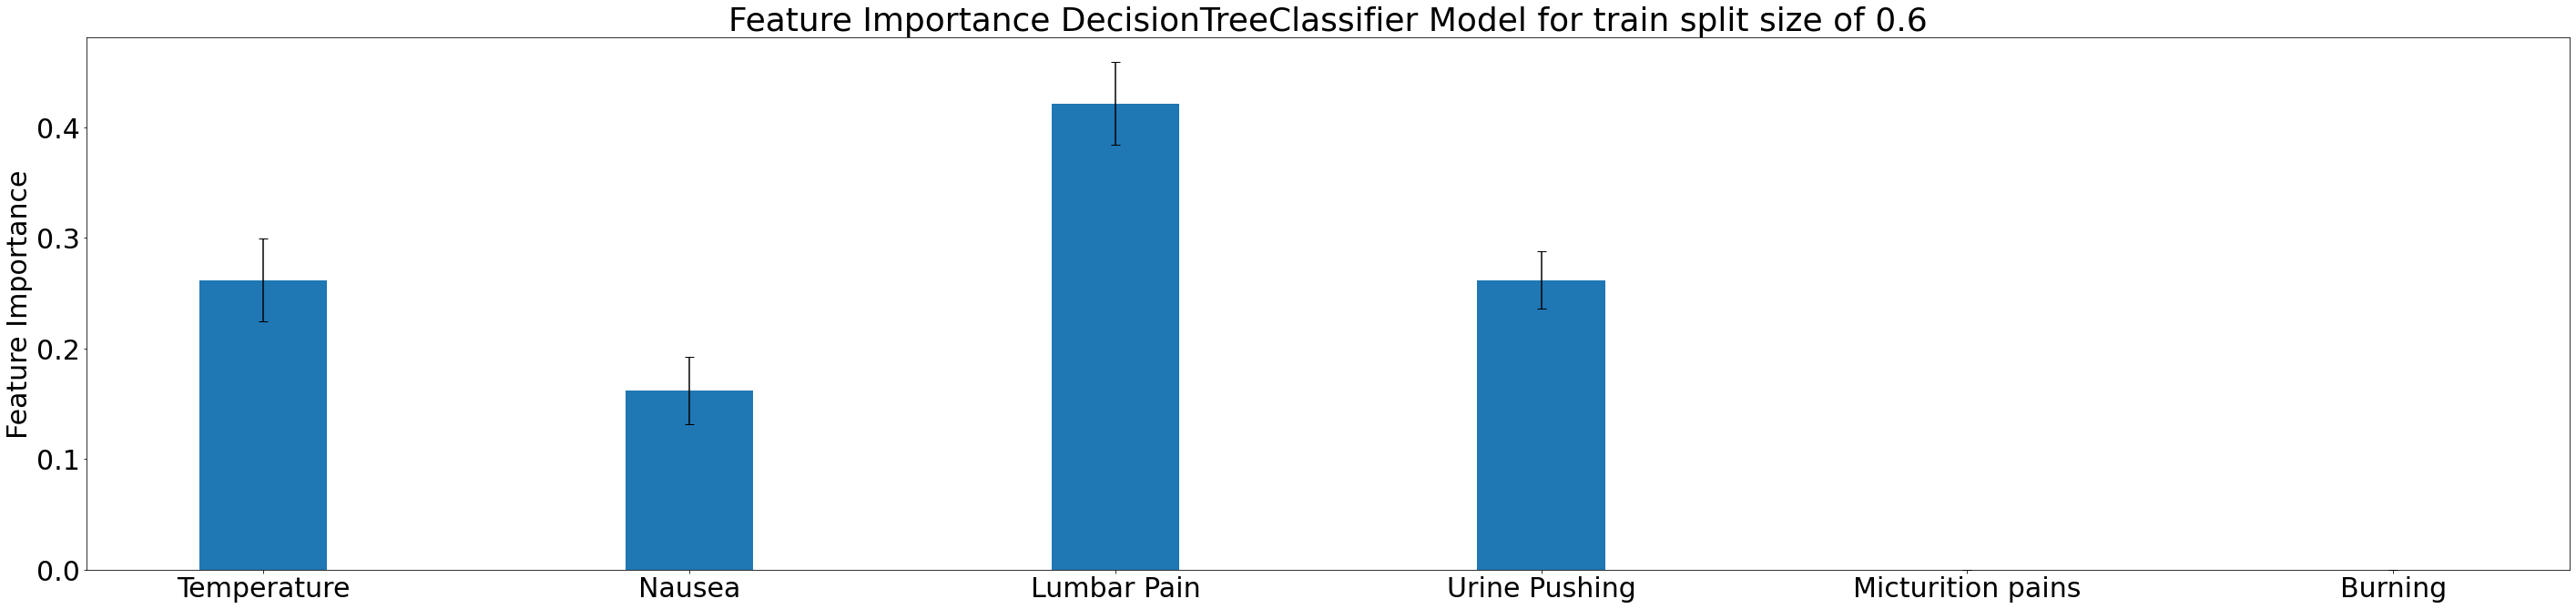

In [8]:
import numpy as np

plt.rcParams.update({'font.size': 30})
plt.rcParams["figure.figsize"] = (40,10)
fig, ax = plt.subplots()
x = np.arange(len(importance_df))
width = 0.3
rects1 = ax.bar(x, height = importance_df['means'], width = width, 
                yerr = importance_df['stds'], align='center', ecolor='black', 
                capsize=5)
ax.set_ylabel('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(importance_df['feature_labels'])
ax.set_title('Feature Importance DecisionTreeClassifier Model for train split size of 0.6')
plt.tight_layout()

In [9]:
importance_df

,feature_labels,means,stds
0,Temperature,0.261905,0.037646
1,Nausea,0.161905,0.030676
2,Lumbar Pain,0.421429,0.037344
3,Urine Pushing,0.261905,0.026082
4,Micturition pains,0.000000,0.000000
5,Burning,0.000000,0.000000
